In [43]:
import pandas
import numpy

In [44]:
data = [[24, 40000, "Yes"], [53, 52000, "No"], [23, 25000, "No"], [25, 77000, "Yes"],
       [32, 48000, "Yes"], [52, 110000, "Yes"], [22, 38000, "Yes"], [43, 44000, "No"], [52, 27000, "No"], [48, 65000, "Yes"]]

In [45]:
df = pandas.DataFrame(data, columns=["Age", "Salary ($)","College Degree"])
df.dtypes

Age                int64
Salary ($)         int64
College Degree    object
dtype: object

In [46]:
import pandas as pd
import numpy as np

def impurity(method, target):
    if method=='entropy':
        # it will only work if the target is in pandas series
        temp = target.value_counts()/target.shape[0] 
        return (numpy.sum(-numpy.log2(temp+1e-9)*temp))

    # else gini index
    else:
        temp = target.value_counts()/target.shape[0] 
        return (1-numpy.sum(pow(temp,2)))

def iG(mfeature, target, method):
    # summing up the mask
    temp1 = sum(mfeature)
    temp2 = mfeature.shape[0] - temp1

    # calculate information gain if temp1 and temp2 are not 0 else information would be 0
    if temp1!=0 and temp2!=0:
        # call the method
        method_val1 = impurity(method, target)
        method_val2 = impurity(method, target[mfeature])
        method_val3 = impurity(method, target[-mfeature])
        val1 = temp1/(temp1+temp2)*method_val2
        val2 = temp2/(temp1+temp2)*method_val3
        val = method_val1 - val1 - val2
        return val
    else:
        return 0



def split_information_gain(feature, target, method='entropy'):
    # sort the feature data and only for unique data to plot in the tree
#     print(feature)
    f = feature.sort_values().unique()[1:]
#     print(f)
    # list to store the information gain and the feature for splitting
    ig_lst = []
    f_lst = []
    # calculate information gain
    for data in f:
        # develop a mask for calculate information gain using gini index or entropy
        mask_feature = data > feature
        information_gain = iG(mask_feature, target, method)
        f_lst.append(data)
        ig_lst.append(information_gain)
#         print(ig_lst)
    if ig_lst:
        # more the information gain better the solution
        return(max(ig_lst), f_lst[ig_lst.index(max(ig_lst))], True, True)
    else:
        x = (None, None, None, False)
        # as there is no ig generated
        return x


In [47]:
def perform_best_divide(df, target):    
    # getting best split based on the value
    # applying split information gain get the mask value

    mval = df.drop(target, axis=1).apply(split_information_gain, target=df[target])

#     print(mval)
    # check if the mval is not null
    t1 = sum(mval.loc[3,:])
    if t1!=0:
        mtemp = mval.loc[:, mval.loc[3,:]]
        # get information about splitting using information gain
        # the maximize information gain
        maxi_information_gain, maxi_split_val, maxi_flag, mf = mtemp[max(mtemp)]
        return (max(mtemp), maxi_split_val, maxi_information_gain, maxi_flag)
    else:
        return (None, None, None, None)

def divide(df, flag, feature, val):
    if flag==False:
        return (df[df[feature].isin(val)], df[(df[feature].isin(val))==False])
    else:
        return (df[df[feature]< val], df[(df[feature]< val)==False])

def output(df, fact):
    if not fact:
        return df.mean()
    else:
        return df.value_counts().idxmax()


In [48]:
def fit(df, fact, min_information_gain = 1e-20, c=0):

    maxi, maxi_split_val, maxi_information_gain, maxi_flag = perform_best_divide(df, "College Degree")
#         print(perform_best_divide(df, "College Degree"))
    
    if maxi_information_gain is not None and maxi_information_gain >= min_information_gain:
        # depth of tree
        print("Information Gain at", maxi_split_val, "=", maxi_information_gain)
        c+=1
        # get left and right
        ltree, rtree = divide(df, maxi_flag, maxi, maxi_split_val)
        if maxi_flag==False:
            s_tree = "in"
        else:
            s_tree = "<="
#         print(maxi, maxi_split_val)
        # Build smaller tree
        q = "{} {} {}".format(maxi, s_tree, maxi_split_val)

        # move left and right
#             print(c)
        la = fit(ltree, fact, min_information_gain, c)
        ra = fit(rtree, fact, min_information_gain, c)

        out = {q: []}

        
        if la!=ra:
            out[q].append(la)
            out[q].append(ra)
        else:
            out = la
        
    else:
        res = output(df['College Degree'], fact)
        return res
    return out, c

In [49]:
tree, depth = fit(df, True)
print("Depth:", depth)
print("Tree Structure:", tree)

Information Gain at 38000 = 0.32192809459882343
Information Gain at 65000 = 0.20443400238395426
Information Gain at 44000 = 0.41997309344489697
Information Gain at 48000 = 0.2516291669069247
Information Gain at 52000 = 0.999999998557305
Depth: 1
Tree Structure: {'Salary ($) <= 38000': ['No', ({'Salary ($) <= 65000': [({'Salary ($) <= 44000': ['Yes', ({'Salary ($) <= 48000': ['No', ({'Salary ($) <= 52000': ['Yes', 'No']}, 5)]}, 4)]}, 3), 'Yes']}, 2)]}


Reference: https://anderfernandez.com/en/blog/code-decision-tree-python-from-scratch/

# Part 1.2 

In [62]:
#Importing all the libraries
import pandas
import numpy
# from sklearn.model_selection import train_test_split

In [63]:
#We will put Yes = 1 for having a college degree and No = 0 for not having a college degree
table = [[24, 40000, 1], [53, 52000, 0], [23, 25000, 0], [25, 77000, 1], [32, 48000, 1], [52, 110000, 1],
          [22, 38000, 1], [43, 44000, 0], [52, 27000, 0], [48, 65000, 1]]

In [64]:
#Creating DataFrame

dataTable = pandas.DataFrame(table, columns=['Age', 'Salary ($)', 'College Degree'])
print(dataTable)
print(dataTable.dtypes)

   Age  Salary ($)  College Degree
0   24       40000               1
1   53       52000               0
2   23       25000               0
3   25       77000               1
4   32       48000               1
5   52      110000               1
6   22       38000               1
7   43       44000               0
8   52       27000               0
9   48       65000               1
Age               int64
Salary ($)        int64
College Degree    int64
dtype: object


#### For building the multivariate tree, we have applied the concept of Perceptron Algorithm function which is $Y=f(∑wi*xi + b)$, for our case we will have two inputs which is x_age and x_salary

#### As we are having two inputs the resulting hyperplane will be a linear separation i.e. a line

In [65]:

costVal = 0 #Calculating error 
signed_val = -1

#Calculating the Mutual Information

def compute_mutual_information(w1, x1, w2, x2, param):
    #print(n0,p0,n1,p1)
    mutual_information = 0
    if ( (w1+w2) * (w1+x1) != 0 and (w1*param)/((w1+w2) * (w1+x1)) != 0 ):
        mutual_information = mutual_information + numpy.log2((w1*param)/((w1+w2) * (w1+x1))) * (w1/param) 
        
    if ( (w1+x1)*(x1+x2) != 0 and (x1*param)/((x1+x2) * (w1+x1)) != 0 ):
        mutual_information = mutual_information + numpy.log2((x1*param)/((x1+x2) * (w1+x1))) * (x1/param) 
        
    if ( (w1+w2) * (w2+x2) != 0 and (w2*param)/((w1+w2) * (w2+x2)) != 0 ):
        mutual_information = mutual_information + numpy.log2((w2*param)/((w1+w2) * (w2+x2))) * (w2/param) 
        
    if ( (x1+x2) * (w2+x2) != 0 and (x2*param)/((x1+x2) * (w2+x2)) != 0 ):
        mutual_information = mutual_information + numpy.log2((x2*param)/((w2+x2) * (x1+x2))) * (x2/param) 
        
    return(mutual_information * signed_val )



In [66]:
# Function for calculating the impurity getting the values of alpha and beta at each point
a = 1
b = 1
list_a = []
list_b = []

def compute_impurity(costVal):
    
    p_lth_no_cd = 0 # total folks having age lesser than THRESHOLD and NO College Degreee
    p_lth_cd = 0 # total folks having age lesser than THRESHOLD and having a College Degreee
    p_hth_no_cd = 0 # total folks having age more than THRESHOLD and NO College Degreee
    p_hth_cd = 0 # total folks having age more than THRESHOLD and having a College Degreee
    
    impurity = [] #Impurity list to calculate the defects in the prediction on each interation
    
    for b in range(0, 100, 1):
        b = b/100
        
        for a in range(0,100,1):
            imp = 0
            a = a/100
            for j in range(10):
                #Implementing the given condition (eventually perceptron logic)
                if (numpy.sign( a * dataTable['Age'][j] + b * dataTable['Salary ($)'][j] -1 ) == 1):
                    if (dataTable['College Degree'][j] == 0):
                        p_hth_no_cd = p_hth_no_cd + 1
                    else:
                        p_hth_cd = p_hth_cd + 1
                
                elif (numpy.sign( a * dataTable['Age'][j] + b * dataTable['Salary ($)'][j] -1 ) == -1):
                    if (dataTable['College Degree'][j] == 0):
                        p_lth_no_cd = p_lth_no_cd + 1
                    else:
                        p_lth_cd = p_lth_cd + 1
                
                else:
                    print("ERROR")                     
            
            #Calculating the error for threshold value
            if costVal == 1:
                impurity.append([a,b,compute_MI(p_lth_no_cd,p_lth_cd,p_hth_no_cd,p_hth_cd,10)])
                
            elif costVal == 0:
                if ( p_lth_cd < p_lth_no_cd):
                    imp = imp + p_lth_cd
                else:
                    imp = imp + p_lth_no_cd
                if ( p_hth_cd < p_hth_no_cd):
                    imp = imp + p_hth_cd
                else:
                    imp = imp + p_hth_no_cd 
                impurity.append([a,b,imp])

            else:               
                break
                
            # Setting the values to 0 again for next iteration
            p_lth_no_cd = 0
            p_lth_cd = 0
            p_hth_no_cd = 0 
            p_hth_cd = 0            
            


    return impurity



In [67]:
impurity = compute_impurity(costVal)

list_MI = [-1,-1,10000]
for k in range(len(impurity)):
    if ( impurity[k][2] < list_MI[2] ):
        list_MI[0] = impurity[k][0]
        list_MI[1] = impurity[k][1]
        list_MI[2] = impurity[k][2]
        

print(impurity[0])
print(impurity[-1])
print("\n")
print(impurity)
print (len(impurity))

ERROR
[0.0, 0.0, 4]
[0.99, 0.99, 4]


[[0.0, 0.0, 4], [0.01, 0.0, 4], [0.02, 0.0, 3], [0.03, 0.0, 3], [0.04, 0.0, 4], [0.05, 0.0, 4], [0.06, 0.0, 4], [0.07, 0.0, 4], [0.08, 0.0, 4], [0.09, 0.0, 4], [0.1, 0.0, 4], [0.11, 0.0, 4], [0.12, 0.0, 4], [0.13, 0.0, 4], [0.14, 0.0, 4], [0.15, 0.0, 4], [0.16, 0.0, 4], [0.17, 0.0, 4], [0.18, 0.0, 4], [0.19, 0.0, 4], [0.2, 0.0, 4], [0.21, 0.0, 4], [0.22, 0.0, 4], [0.23, 0.0, 4], [0.24, 0.0, 4], [0.25, 0.0, 4], [0.26, 0.0, 4], [0.27, 0.0, 4], [0.28, 0.0, 4], [0.29, 0.0, 4], [0.3, 0.0, 4], [0.31, 0.0, 4], [0.32, 0.0, 4], [0.33, 0.0, 4], [0.34, 0.0, 4], [0.35, 0.0, 4], [0.36, 0.0, 4], [0.37, 0.0, 4], [0.38, 0.0, 4], [0.39, 0.0, 4], [0.4, 0.0, 4], [0.41, 0.0, 4], [0.42, 0.0, 4], [0.43, 0.0, 4], [0.44, 0.0, 4], [0.45, 0.0, 4], [0.46, 0.0, 4], [0.47, 0.0, 4], [0.48, 0.0, 4], [0.49, 0.0, 4], [0.5, 0.0, 4], [0.51, 0.0, 4], [0.52, 0.0, 4], [0.53, 0.0, 4], [0.54, 0.0, 4], [0.55, 0.0, 4], [0.56, 0.0, 4], [0.57, 0.0, 4], [0.58, 0.0, 4], [0.59, 0.0, 4], [0.6, 0

##### Final Multivariate Decison Tree

<img src="DecisionTreeMultivariate.jpeg" width="500" height="500">

# Part 1.3

Multivariate decision trees have several advantages compared to univariate decision trees, including:

Multivariate decision trees are able to capture more complex relationships between different variables. This allows them to better model real-world data and make more accurate predictions.

Multivariate decision trees can handle missing or incomplete data more gracefully than univariate decision trees. This is because they are able to use information from other variables to make predictions, even if some data is missing.

Multivariate decision trees are more interpretable than univariate decision trees. This is because they use multiple variables to make predictions, so the relationships between the variables are more transparent and easier to understand.

Multivariate DT can be of lesser depth as compared to univariate DT, and it is not restricted to only orthogonal boundaries.

However, there are also some disadvantages to using multivariate decision trees, including:

Multivariate decision trees can be more difficult to train and tune than univariate decision trees. This is because they have more parameters and require more data to model the complex relationships between the variables. Also, because it use regression techniques in further splitting, which is expensive computationally. 

Multivariate decision trees can be more sensitive to noise and outliers in the data. This is because they use multiple variables to make predictions, so a small amount of noise or outlier data can have a larger impact on the model's performance.



##### Pros and Cons Specific to the given problem

The given data can be considered as 2-dimension (as we have two features i.e. age and salary)and hence the algorithm works efficiently. But there can be some challenges when the data is uneven, unseparable and not clustered. So, for such data it is best to use univariate trees. 

##### Reference:
1) https://courses.cs.washington.edu/courses/cse446/13sp/slides/decision-trees-boosting-annotated.pdf

2) https://github.com/lnies?tab=repositories

3) https://machinelearningmastery.com/implement-perceptron-algorithm-scratch-python/

4) https://machinelearningmastery.com/implement-decision-tree-algorithm-scratch-python/

5) https://www.kdnuggets.com/2020/01/decision-tree-algorithm-explained.html

6) https://machinelearningmastery.com/information-gain-and-mutual-information/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
def load_data(path, test_size, dataset):

      
    if dataset == "letter":
        df = pd.read_csv(path)
        le = LabelEncoder()
        df = df.loc[df['T'].isin(['C','G'])]
        df['T'] = le.fit_transform(df['T'])
        df['T'] = df['T'].replace(0,-1)

        y = df['T'].values
        x = df.iloc[:,1:].values
    elif dataset == "spam_ham":
        df = pd.read_csv(path, header=None)
        y = df[57]
        x = df.drop(columns=57)
    
    else:
        df = pd.read_csv(path, header=None, sep=' ')
        le = LabelEncoder()
        y = df[20]
        x = df.drop(columns=20)
        for clms in x.columns:
            x[clms] = le.fit_transform(x[clms])
         
    x_train, x_test, y_train, y_test = train_test_split(
        x, y, test_size = test_size,
        random_state=42)
    
    return x_train, x_test, y_train, y_test

In [3]:
class Model:

    def __init__(self, T, dataset, path, model):
        self.model = model
        self.dataset = dataset
        self.path = path
        self.T = T
        self.x_train, self.x_test, self.y_train, self.y_test = load_data(path=self.path, test_size=0.3, dataset=self.dataset)
        self.trees = []
 

    def bagging(self, bootstraps):

        np.random.seed(100)
        N, D = self.x_train.shape
        train_size, test_size = len(self.x_train), len(self.x_test) 

        bagging_train_error= []
        bagging_test_error = [] 

        for bootstrap in range(bootstraps):
            bootstrap_sample = np.random.choice(np.arange(N), size = N, replace = True)
            
            x_train_sample = self.x_train[bootstrap_sample]
            y_train_sample = self.y_train[bootstrap_sample]
            

            tree = DecisionTreeClassifier(max_depth = 1, random_state = 1)

            tree.fit(x_train_sample, y_train_sample)

            self.trees.append(tree)

            pred_train, pred_test = [np.zeros(train_size), np.zeros(test_size)]

            train_preds_i = tree.predict(x_train_sample)
            test_preds_i = tree.predict(self.x_test)

            pred_train = [sum(k) for k in zip(pred_train, 
                                            [i for i in train_preds_i])]
            pred_test = [sum(x) for x in zip(pred_test, 
                                            [i for i in test_preds_i])]

        
            pred_train, pred_test = np.sign(pred_train), np.sign(pred_test) 

            train_error = self.compute_err_rate(pred_train, y_train_sample)
            test_error = self.compute_err_rate(pred_test, self.y_test)

            bagging_train_error.append(train_error)
            bagging_test_error.append(test_error)

        
        return np.mean(bagging_train_error), \
                np.mean(bagging_test_error)

 
    def compute_err_rate(self, y_pred, y_true):
        return sum(y_pred!=y_true)/float(len(y_true))

    
    def DTClassifier(self):
        clf = self.model
        clf.fit(self.x_train,self.y_train)
        pred_train = clf.predict(self.x_train)
        pred_test = clf.predict(self.x_test)
        return self.compute_err_rate(pred_train, self.y_train), \
           self.compute_err_rate(pred_test, self.y_test)
    
    def adaboost(self, M):
        train_size, test_size = len(self.x_train), len(self.x_test) 

        w_i = np.ones(train_size) / test_size

        # initializing arrays of size train and test
        pred_train, pred_test = [np.zeros(train_size), np.zeros(test_size)]
        
        clf = self.model
        if M == 0 or M is None:
            M = self.T 

        for i in range(M):
            
            clf.fit(self.x_train, self.y_train, sample_weight = w_i)
            
            train_preds_i = clf.predict(self.x_train)
            test_preds_i = clf.predict(self.x_test)
            
            # Indicator function
            misclassifications = [int(i) for i in (train_preds_i != self.y_train)]
            
            # penalize if you miss
            missclassification2 = [i if i==1 else -1 for i in misclassifications]
            
            # Error
            err = np.dot(w_i,misclassifications) / sum(w_i)

            # Alpha
            epsilon = 1e-10
            alpha_t = 0.5 * np.log( (1 - err + epsilon) / float(err + epsilon))

            # Update weights
            w_i = np.multiply(w_i, np.exp([float(i) * alpha_t for i in missclassification2]))

            # Add to prediction list

            pred_train = [sum(k) for k in zip(pred_train, 
                                            [i * alpha_t for i in train_preds_i])]
            pred_test = [sum(x) for x in zip(pred_test, 
                                            [i * alpha_t for i in test_preds_i])]

        
        pred_train, pred_test = np.sign(pred_train), np.sign(pred_test) 

        return self.compute_err_rate(pred_train, self.y_train), \
            self.compute_err_rate(pred_test, self.y_test)
        
    def plot(self, train_error, test_error):

        df_error = pd.DataFrame([train_error, test_error]).T
        df_error.columns = ['Training Error', 'Test Error']
        plot1 = df_error.plot(linewidth = 4, figsize = (10,8),
                color = ['darkblue', 'green'], grid = True)
        plot1.set_xlabel('Number of iterations', fontsize = 14)
        plot1.set_xticklabels(range(0,450,50))
        plot1.set_ylabel('Error rate', fontsize = 14)
        plot1.set_title('Error rate vs number of iterations', fontsize = 18)
        plt.axhline(y=train_error[0], linewidth=1, color = 'blue', ls = 'dashed')

## Boosting

### Letter Recognition Dataset

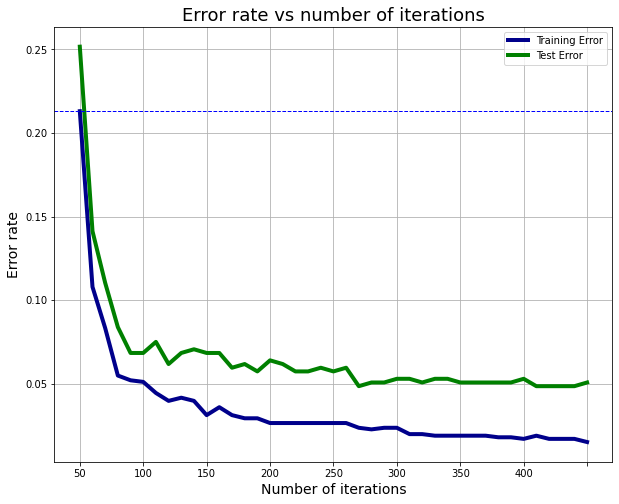

In [4]:
model = DecisionTreeClassifier(max_depth = 1, random_state = 1) 
boost = Model(T=10, dataset="letter", path='letter-recognition.data', model=model) 
errors= boost.DTClassifier()
train_error, test_error = [errors[0]], [errors[1]]

x_range = range(10, 410, 10)
for i in x_range:    
    error_i = boost.adaboost(M=i)
    train_error.append(error_i[0])
    test_error.append(error_i[1]) 
boost.plot(train_error, test_error)
# The error rates decrease as we increase the number of trees

### Spam dataset

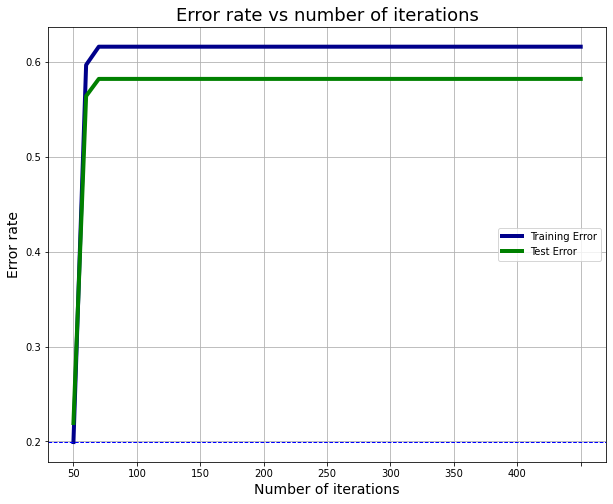

In [125]:
model = DecisionTreeClassifier(max_depth = 1, random_state = 1) 
boost = Model(T=10, dataset="spam_ham", path='spambase.data', model=model) 
errors= boost.DTClassifier()
train_error, test_error = [errors[0]], [errors[1]]

x_range = range(10, 410, 10)
for i in x_range:    
    error_i = boost.adaboost(M=i)
    train_error.append(error_i[0])
    test_error.append(error_i[1]) 
boost.plot(train_error, test_error)

# The training and testing error is not increasing for boosting


### German Credit dataset

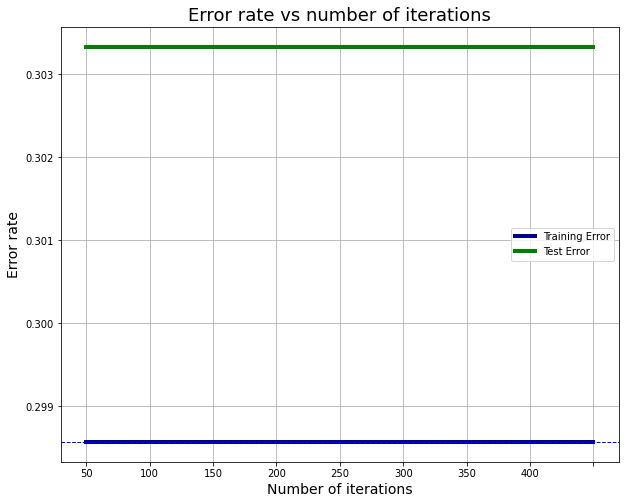

In [128]:
model = DecisionTreeClassifier(max_depth = 1, random_state = 1) 
boost = Model(T=10, dataset="german", path='german.data', model=model) 
errors= boost.DTClassifier()
train_error, test_error = [errors[0]], [errors[1]]

x_range = range(10, 410, 10)
for i in x_range:    
    error_i = boost.adaboost(M=i)
    train_error.append(error_i[0])
    test_error.append(error_i[1]) 
boost.plot(train_error, test_error)
# The error rates decrease as we increase the number of trees

## Bagging

### German Credit dataset

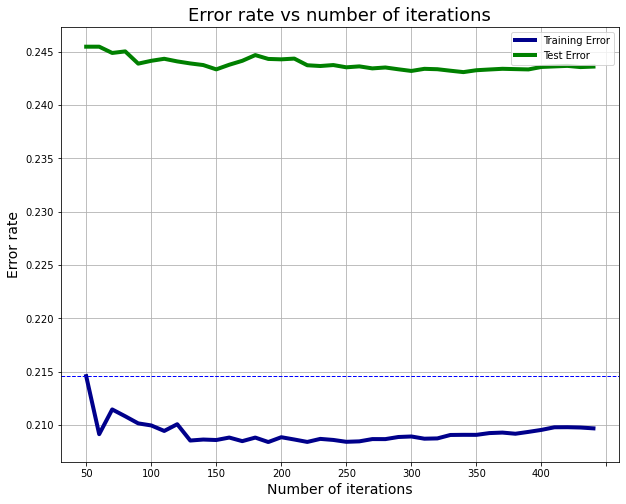

In [5]:
model = Model(T=10, dataset="letter", path='letter-recognition.data', model=model) 
 
x_range = range(10,410,10)
train_error, test_error = [], []
for i in x_range:
    train_e, test_e = model.bagging(bootstraps=i)
    train_error.append(train_e)
    test_error.append(test_e)
model.plot(train_error, test_error)

# The model is overfitting (but bagging is a better estimate)

# It is a better estimate for boosting

### Letter-Recognition 

In [ ]:
model = Model(T=10, dataset="german", path='german.data', model=model) 
 
x_range = range(10,410,10)
train_error, test_error = [], []
for i in x_range:
    train_e, test_e = model.bagging(bootstraps=i)
    train_error.append(train_e)
    test_error.append(test_e)
model.plot(train_error, test_error)

# The model is overfitting (but bagging is a better estimate)

### Spam

In [ ]:
model = Model(T=10, dataset="spam_ham", path='spambase.data', model=model) 
 
x_range = range(10,410,10)
train_error, test_error = [], []
for i in x_range:
    train_e, test_e = model.bagging(bootstraps=i)
    train_error.append(train_e)
    test_error.append(test_e)
model.plot(train_error, test_error)

# The model is overfitting (but bagging is a better estimate)

### Bagging is a better estimate, as it averages all trees' predictions and hence can mitigate bias as well. 

## References

1) https://dafriedman97.github.io/mlbook/content/c6/s2/bagging.html

2) https://contactsunny.medium.com/how-to-split-your-dataset-to-train-and-test-datasets-using-scikit-learn-e7cf6eb5e0d

3) https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

4) https://music.apple.com/us/listen-now

5) https://github.com/SiluPanda/ensemble-learning-bagging-and-boosting

6) https://machinelearningmastery.com/implement-bagging-scratch-python/